# Classic NLP: Tourist Review

The following exercise is based on the exam of CIMAT NLP course 2025. 

We'll process tourist reviews from 10 different places in Guanajuato, Guanajuato, Mexico, in order to gain valuable insights.

The places and number of reviews for each place are:

1. Basilica Colegiata 560
2. Mercado Hidalgo 600
3. Casa de Diego Rivera 698
4. Universidad de Guanajuato 900
5. Teatro Juárez 1,010
6. Jardín de la Unión 1,134
7. Callejón del Beso 1,360
8. Monumento Pípila 1,620
9. Museo de las momias 1,650
10. Alhóndiga 930

Each review consists of 12 fields, consisting of:
- Gender -  categorical string
- Age - integer
- Nationality categorical string
- Grade - categorical string
- Scale - integer
- Reviews- integer
- Title - string
- Opinion  - string
- Country - categorical string
- Languague - categorical string
- Device - categorical string
- Date - date formate DD/MM/YY



1. First we'll check general statistics on the reviews for each place: average grade and variance, average opinion length and variance, age histogram, type of visitor histogram, most frequent nationality, and gender.

In [1]:
import os
import pandas as pd
#Get each csv from the base route where the work file is
#save in a diccionary for later iterations

base_path = os.getcwd()
dfs = {}
for filename in os.listdir(base_path):
    if filename.endswith(".csv"):
        name = os.path.splitext(filename)[0]
        print(name,filename)
        dfs[name] = pd.read_csv(filename, encoding ='latin1')
        
#review name for each column
for i in dfs:
    print(dfs[i].columns)

10_alhondiga 10_alhondiga.csv
1_basilica 1_basilica.csv
2_m_hidalgo 2_m_hidalgo.csv
3_d_rivera 3_d_rivera.csv
4_un_guanajuato 4_un_guanajuato.csv
5_t_juarez 5_t_juarez.csv
6_j_union 6_j_union.csv
7_c_beso 7_c_beso.csv
8_pipila 8_pipila.csv
9_momias 9_momias.csv
Index(['Gender', 'Age', 'Nationality', 'Grade', 'Scale', 'Reviews', 'Title',
       'Opinion', 'Country', 'Language', 'Device', 'Date'],
      dtype='object')
Index(['Gender', 'Age', 'Nationality', 'Grade', 'Scale', 'Reviews', 'Title',
       'Opinion', 'Country', 'Language', 'Device', 'Date'],
      dtype='object')
Index(['Gender', 'Age', 'Nationality', 'Grade', 'Scale', 'Reviews', 'Title',
       'Opinion', 'Country', 'Language', 'Device', 'Date'],
      dtype='object')
Index(['Gender', 'Age', 'Nationality', 'Grade', 'Scale', 'Reviews', 'Title',
       'Opinion', 'Country', 'Language', 'Device', 'Date'],
      dtype='object')
Index(['Gender', 'Age', 'Nationality', 'Grade', 'Scale', 'Reviews', 'Title',
       'Opinion', 'Countr


===== Analysis for: 10_alhondiga =====
Scale average: 4.45
Scale std: 0.75
Opinion length average: 271.79
Opinion length std: 193.77
Nationality count:
Nationality
Nacional         630
Internacional    300
Name: count, dtype: int64
Most visiting country: México
Gender count:
Gender
Masculino    513
Femenino     417
Name: count, dtype: int64

===== Analysis for: 1_basilica =====
Scale average: 4.50
Scale std: 0.67
Opinion length average: 227.19
Opinion length std: 164.19
Nationality count:
Nationality
Internacional    284
Nacional         276
Name: count, dtype: int64
Most visiting country: México
Gender count:
Gender
Masculino    317
Femenino     243
Name: count, dtype: int64

===== Analysis for: 2_m_hidalgo =====
Scale average: 3.95
Scale std: 0.95
Opinion length average: 263.94
Opinion length std: 188.14
Nationality count:
Nationality
Internacional    301
Nacional         299
Name: count, dtype: int64
Most visiting country: México
Gender count:
Gender
Masculino    328
Femenino     2

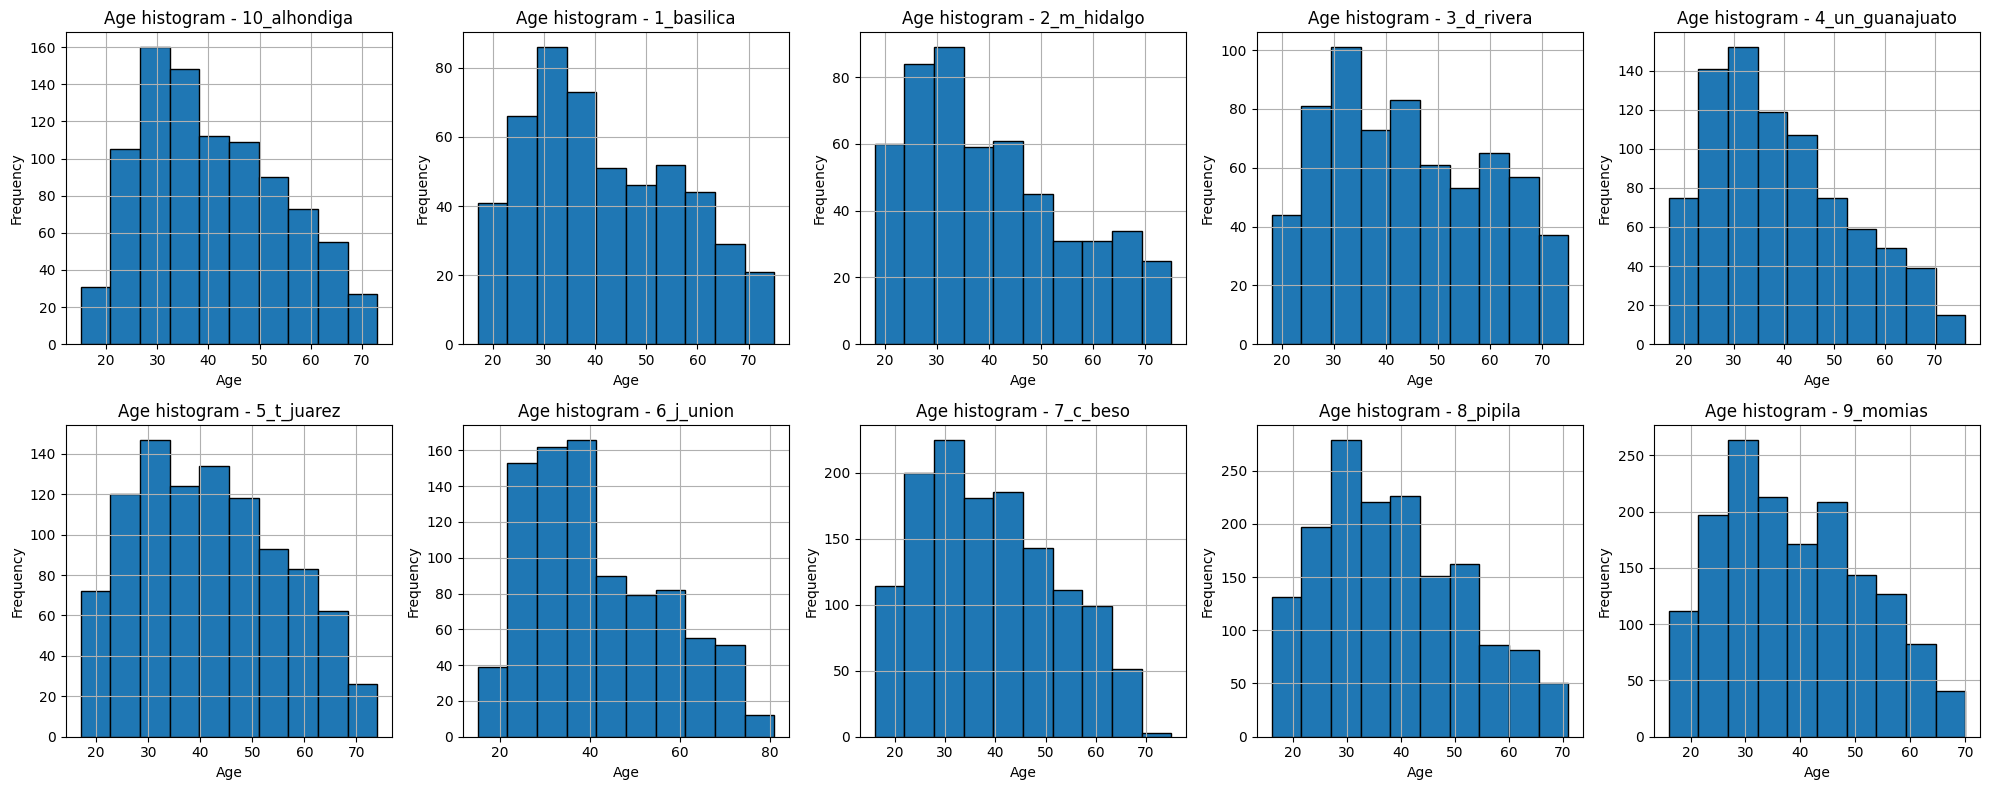


📊 Tabla resumen de resultados numéricos:
             Lugar  Scale avg  Scale std  Opinion length avg  \
0     10_alhondiga   4.454839   0.745711          271.788172   
1       1_basilica   4.500000   0.668750          227.189286   
2      2_m_hidalgo   3.948333   0.950703          263.935000   
3       3_d_rivera   4.243553   0.804039          277.161891   
4  4_un_guanajuato   4.603333   0.612613          208.567778   
5       5_t_juarez   4.702970   0.518146          239.888119   
6        6_j_union   4.591711   0.607370          248.666667   
7         7_c_beso   3.995588   0.971247          233.806430   
8         8_pipila   4.377778   0.767950          264.432716   
9         9_momias   3.675152   1.136495          325.700000   

   Opinion length std Most visiting country  
0          193.772422                México  
1          164.190560                México  
2          188.140734                México  
3          166.846241                México  
4          115.317788  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def review_analysis(dfs):
    """
    Read the dictionary with each page of reviews and get statistics.
    Show a table summary of numerical results and a grid of histograms.
    """
    results_list = []  # summary table
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # to iterate

    for idx, (name, df) in enumerate(dfs.items()):
        print(f"\n===== Analysis for: {name} =====")

        # Scale average and std
        scale_avg = df['Scale'].mean()
        scale_std = df['Scale'].std()
        print(f"Scale average: {scale_avg:.2f}")
        print(f"Scale std: {scale_std:.2f}")

        # Opinion length average and std
        opinion_lengths = df['Opinion'].astype(str).apply(len)
        len_avg = opinion_lengths.mean()
        len_std = opinion_lengths.std()
        print(f"Opinion length average: {len_avg:.2f}")
        print(f"Opinion length std: {len_std:.2f}")

        # Nationality count
        nationality_count = df['Nationality'].value_counts()
        print("Nationality count:")
        print(nationality_count)

        # Most visiting country (mode)
        country_mode = df['Country'].mode()
        country_mode_value = country_mode.iloc[0] if not country_mode.empty else ""
        print("Most visiting country:", country_mode_value)

        # Gender count
        gender_count = df['Gender'].value_counts()
        print("Gender count:")
        print(gender_count)

        # Add to results list
        results_list.append({
            'Lugar': name,
            'Scale avg': scale_avg,
            'Scale std': scale_std,
            'Opinion length avg': len_avg,
            'Opinion length std': len_std,
            'Most visiting country': country_mode_value
        })

        # Histogram in each place
        if idx < 10:
            ax = axes[idx]
            df['Age'].dropna().astype(int).hist(bins=10, edgecolor='black', ax=ax)
            ax.set_title(f"Age histogram - {name}")
            ax.set_xlabel('Age')
            ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Summary table creation and printing
    resumen_df = pd.DataFrame(results_list)
    print("Summary of results")
    print(resumen_df)

    return resumen_df

resumen = review_analysis(dfs)

2. Using word cloud we'll visualize the 50 most relevant words for each location. From ( https://amueller.github.io/word_cloud/ )


===== Generating WordCloud for: 10_alhondiga =====


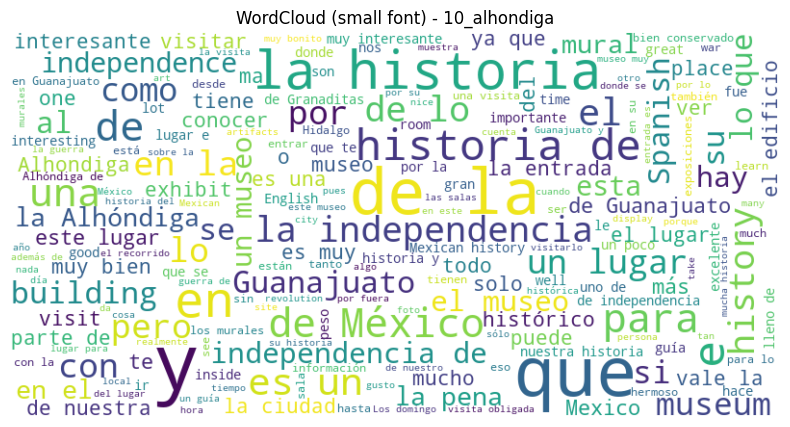


===== Generating WordCloud for: 1_basilica =====


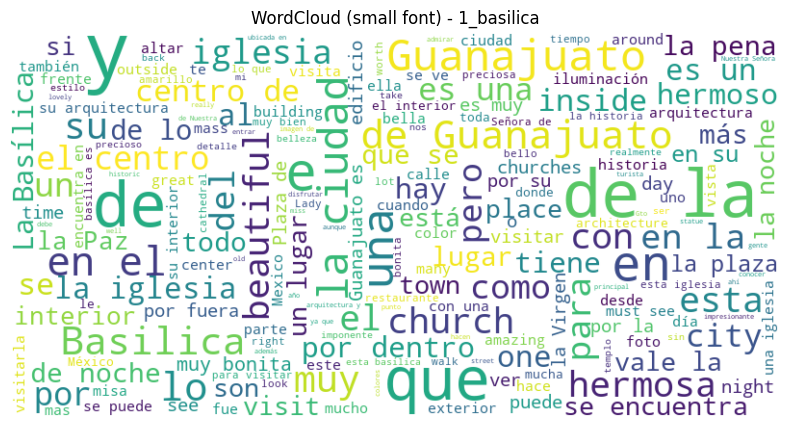


===== Generating WordCloud for: 2_m_hidalgo =====


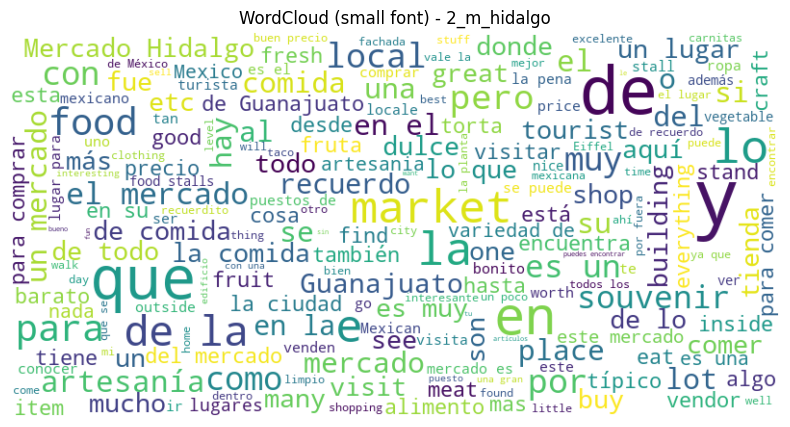


===== Generating WordCloud for: 3_d_rivera =====


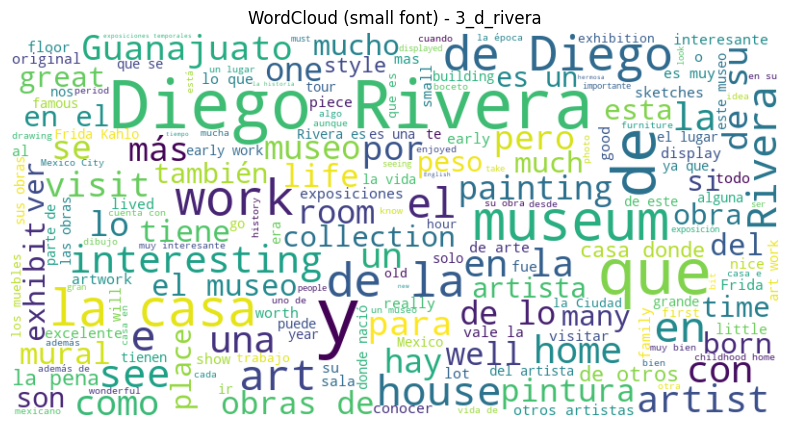


===== Generating WordCloud for: 4_un_guanajuato =====


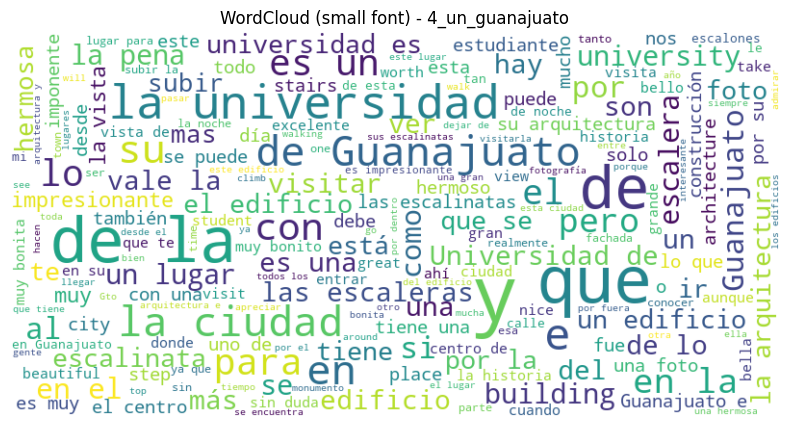


===== Generating WordCloud for: 5_t_juarez =====


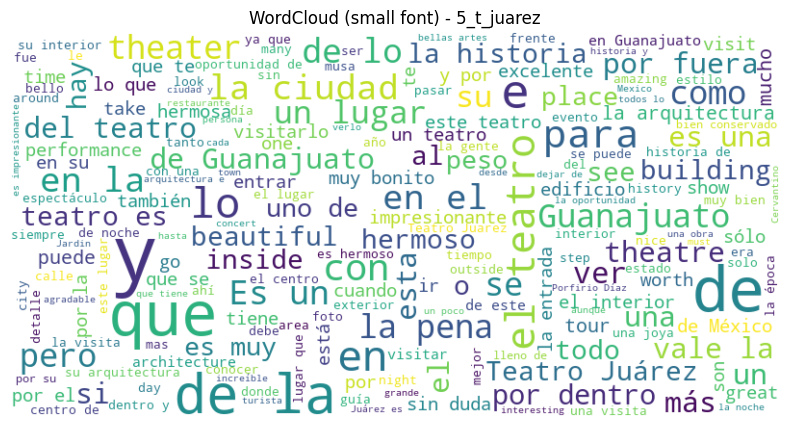


===== Generating WordCloud for: 6_j_union =====


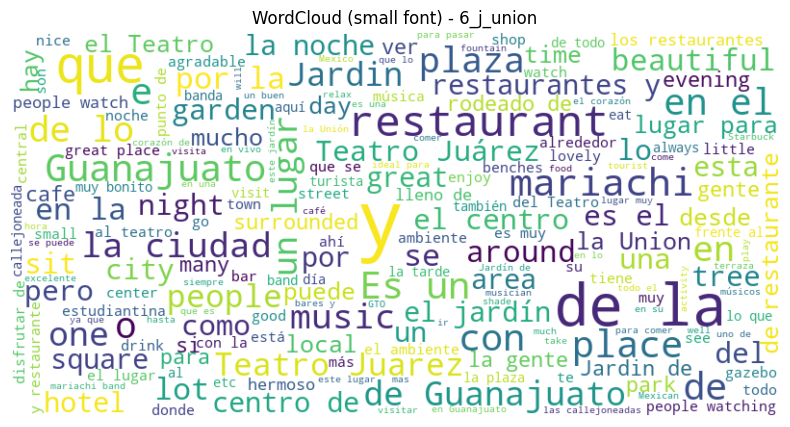


===== Generating WordCloud for: 7_c_beso =====


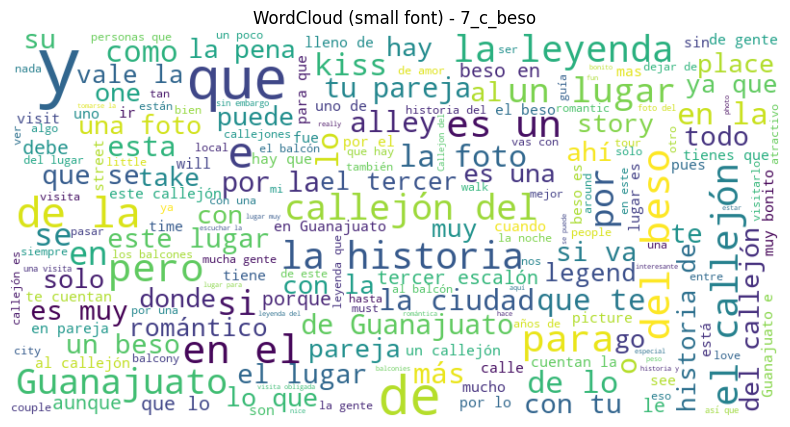


===== Generating WordCloud for: 8_pipila =====


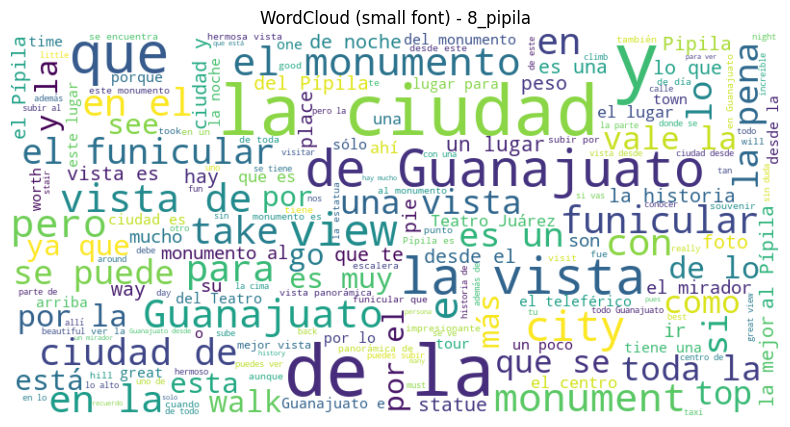


===== Generating WordCloud for: 9_momias =====


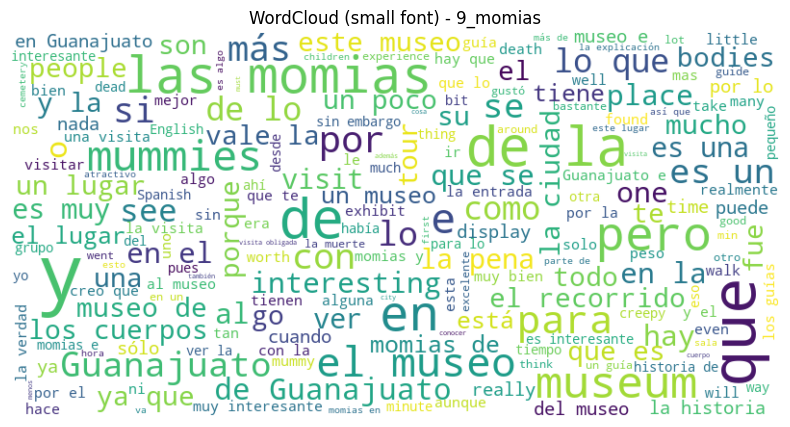

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Well concatenate each opinion from each place to form a basis. This basis will later be
#fed to the wordcloud

def generate_wordclouds(dfs):
    """
    Iterate over each DataFrame in the dictionary dfs,
    concatenate all text from the 'Opinion' column,
    and generate a WordCloud for each.
    """
    for name, df in dfs.items():
        print(f"\n===== Generating WordCloud for: {name} =====")

        # Concatenate all text in the 'Opinion' column into a single string
        text = " ".join(df['Opinion'].dropna().astype(str))

        # Generate the word cloud image
        # Display the generated image using matplotlib
        # word cloud with lower max font size
        wordcloud_small_font = WordCloud(width=800, height=400, background_color='white', max_font_size=80).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_small_font, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"WordCloud (small font) - {name}")
        plt.show()

# Usage
generate_wordclouds(dfs)



3. Next we will analyze topics with LSA for each place on the following groups of people:
- man
- woman
- national tourist
- international tourist
- young people (39 or less)
- old people (40 or more)

As a reminder Latent Semantic Analysis (LSA) is an analogue to Principal Component Analysis (PCA) for natural language processing. As the dimension of language is usually enormous, PCA approach is not convenient. In LSA we map the representing vector of each document, made with a Box Of Word (BOW) and a term by document matrix, to a lower dimension space using Singular Value Descomposition (SVD). Then we can recover insights between words and documents by looking at the biggest values in the SVD.

In SVD we have

$$ X= U S V^T $$

Where $X$ is the term document matrix, $U$ has the terms eig vector as columns, $S$ has the singular values in the diagonal, and $V^T$ has the document eig vector as rows.

A specific value i,j in the column vectors in $U$, is how important is that specific word, i, for a certain latent topic ,j.

A specific value i,j in the row vector in $V$, is how important is that specific latent topic, i, for a document, j.

In [36]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
import pandas as pd
from gensim import corpora, models
from nltk.tokenize import TweetTokenizer
import string
import warnings

warnings.filterwarnings("ignore")  # Hide warnings

def analyze_lsa_by_groups(dfs, num_topics=3):
    """
    Iterate over each DataFrame in dfs, group by Gender, Nationality and Age,
    tokenize and clean text, build dictionary, apply TF-IDF and LSA, and print topics.
    """
    punctuations = set(string.punctuation)
    tokenizer = TweetTokenizer()
    
    #Save stopwords
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    stop_words = stop_words_es.union(stop_words_en)
    
    for name, df in dfs.items():
        print(f"\n\n===== Analyzing dataset: {name} =====")

        # Define age bins
        bins = [0, 39, 100]
        labels = ['<40', '>=40']
        df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

        # Define grouping columns
        group_columns = ['Gender', 'Nationality', 'AgeGroup']

        for group_col in group_columns:
            print(f"\n--- Grouping by: {group_col} ---")
            grouped = df.groupby(group_col)

            for group_value, subdf in grouped:
                if pd.isnull(group_value):
                    continue  # skip NaN groups

                print(f"\n>>> Group: {group_value}")

                # Build list of documents: each document is a list of tokens from a single comment
                documents = []
                for opinion in subdf['Opinion'].dropna().astype(str):
                    tokens = [
                        token.lower() for token in tokenizer.tokenize(opinion)
                        if token.lower() not in punctuations and token.lower() not in stop_words
                    ]
                    if tokens:  # skip empty token lists
                        documents.append(tokens)

                if len(documents) == 0:
                    print("No valid documents after tokenization. Skipping this group.")
                    continue

                # Build dictionary and corpus
                dictionary = corpora.Dictionary(documents)
                corpus = [dictionary.doc2bow(doc) for doc in documents]

                # Apply TF-IDF
                tfidf_model = models.TfidfModel(corpus)
                print(tfidf_model)
                corpus_tfidf = tfidf_model[corpus]

                # Apply LSA (LSI Model)
                lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)

                print(f"Topics for group '{group_value}':")
                topics = lsi_model.print_topics(num_topics=num_topics, num_words=10)
                for topic in topics:
                    print(topic)


analyze_lsa_by_groups(dfs, num_topics=3)




===== Analyzing dataset: 10_alhondiga =====

--- Grouping by: Gender ---

>>> Group: Femenino
TfidfModel<num_docs=417, num_nnz=8541>
Topics for group 'Femenino':
(0, '0.240*"lugar" + 0.234*"historia" + 0.200*"museo" + 0.178*"méxico" + 0.170*"guanajuato" + 0.157*"conocer" + 0.142*"si" + 0.140*"independencia" + 0.139*"edificio" + 0.138*"pena"')
(1, '0.331*"history" + 0.240*"museum" + 0.228*"mexican" + 0.206*"building" + 0.195*"place" + 0.188*"spanish" + 0.163*"well" + 0.158*"interesting" + 0.157*"visit" + 0.138*"independence"')
(2, '0.375*"conocer" + 0.276*"parte" + 0.247*"importante" + -0.183*"salas" + -0.158*"murales" + 0.148*"guanajuato" + -0.137*"bien" + -0.130*"cada" + -0.130*"edificio" + 0.130*"méxico"')

>>> Group: Masculino
TfidfModel<num_docs=513, num_nnz=11708>
Topics for group 'Masculino':
(0, '-0.270*"lugar" + -0.216*"méxico" + -0.214*"historia" + -0.200*"independencia" + -0.184*"museo" + -0.165*"visita" + -0.161*"guanajuato" + -0.158*"visitar" + -0.155*"si" + -0.139*"bien"

4. Now for each of the 10 tourist sites, we'll build three Bags of Words as follows:
i) the 1,000 terms with the highest TF-IDF weights,
ii) the 2,000 bigrams with the highest TF-IDF weights, and
iii) the 1,000 trigrams with the highest TF-IDF weights.

Then, concatenate the three representations (which were computed independently, each with its own TF-IDF space and its own L2 normalization). On this combined space of 4,000 features, we'll apply feature selection using chi2 to obtain the 1,000 most relevant features.

Finally we'll built a word cloud with the top 50 most relevant features for each tourist site. Each cloud will display together the best unigrams, bigrams, and trigrams obtained after applying feature selection on the global feature space.


===== Generating WordCloud of characteristics for: 10_alhondiga =====


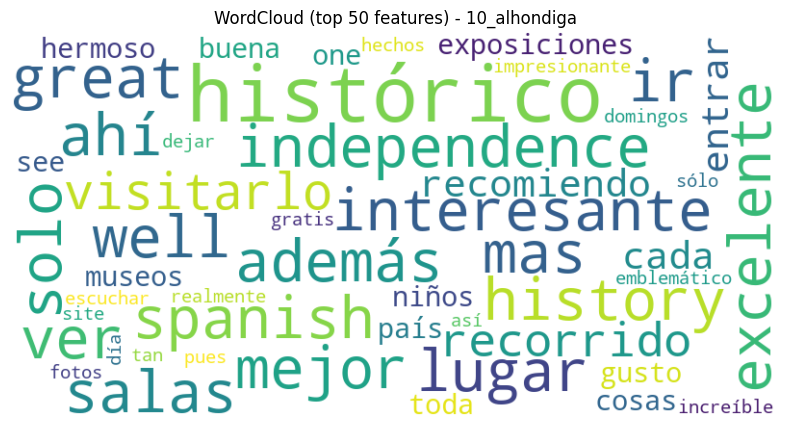


===== Generating WordCloud of characteristics for: 1_basilica =====


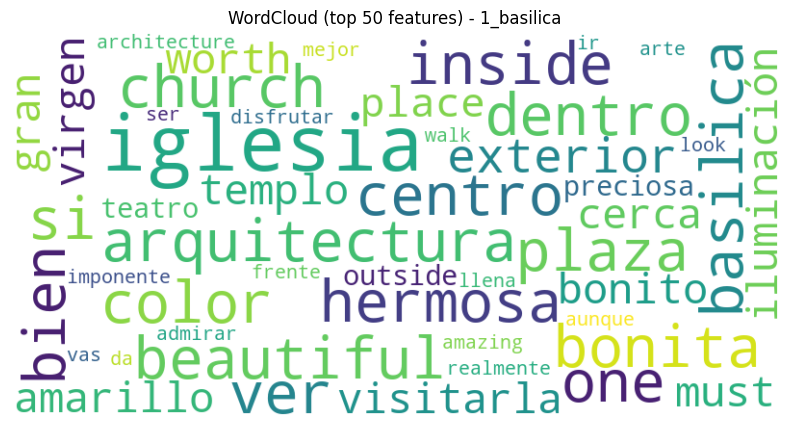


===== Generating WordCloud of characteristics for: 2_m_hidalgo =====


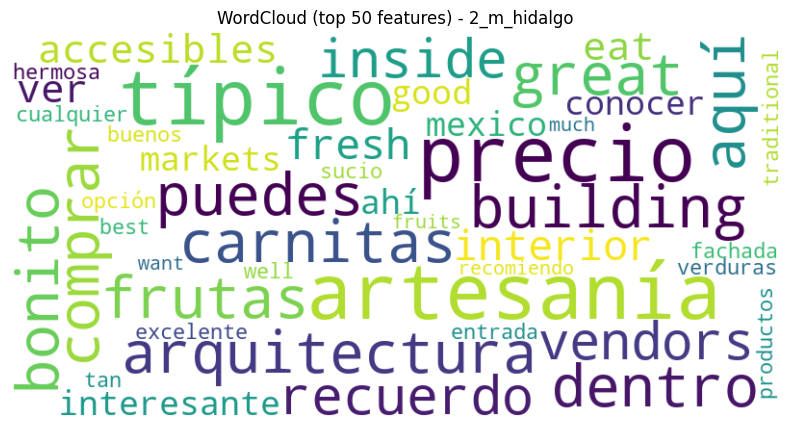


===== Generating WordCloud of characteristics for: 3_d_rivera =====


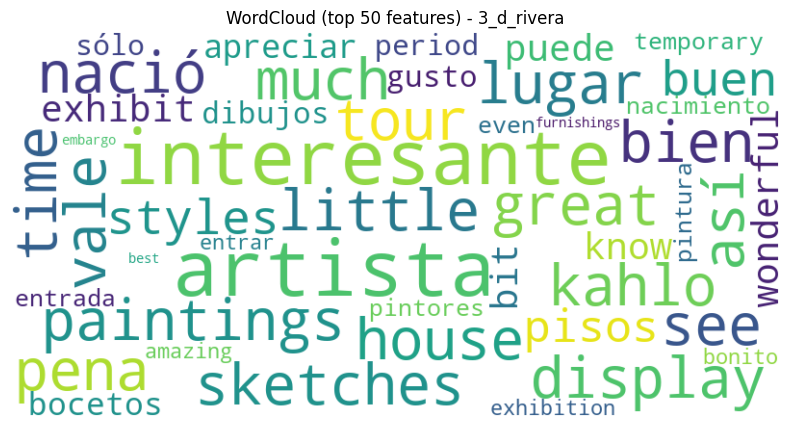


===== Generating WordCloud of characteristics for: 4_un_guanajuato =====


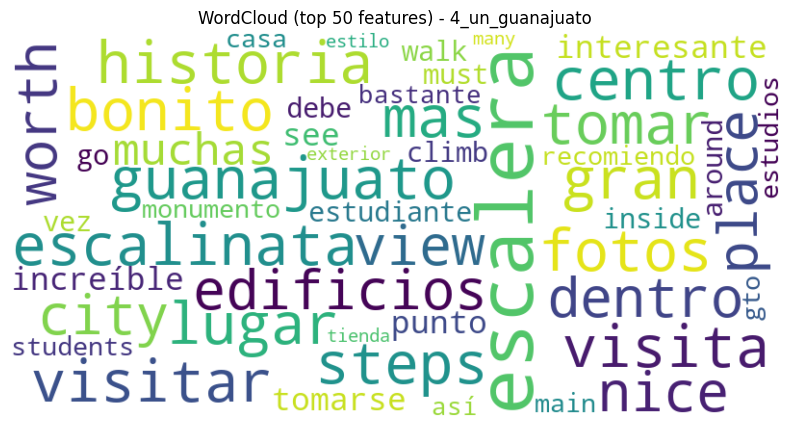


===== Generating WordCloud of characteristics for: 5_t_juarez =====


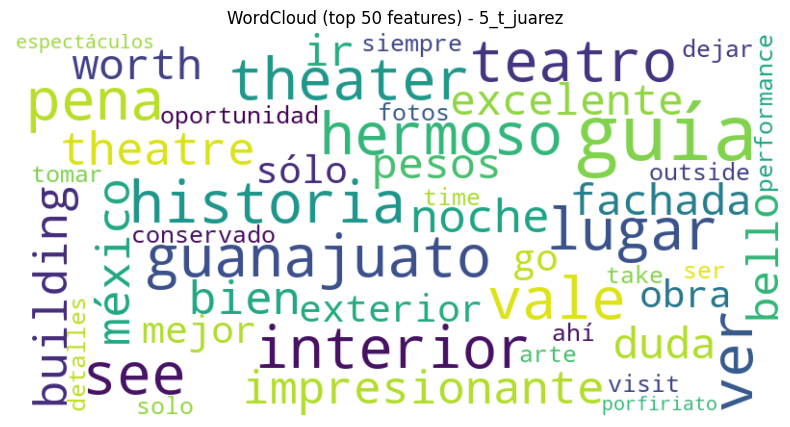


===== Generating WordCloud of characteristics for: 6_j_union =====


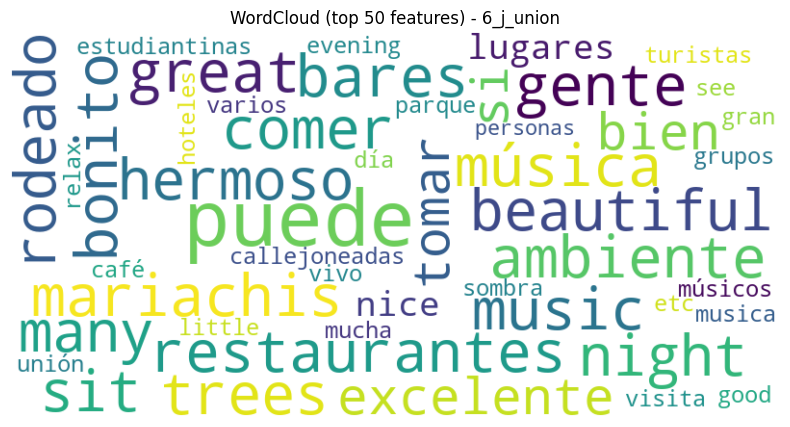


===== Generating WordCloud of characteristics for: 7_c_beso =====


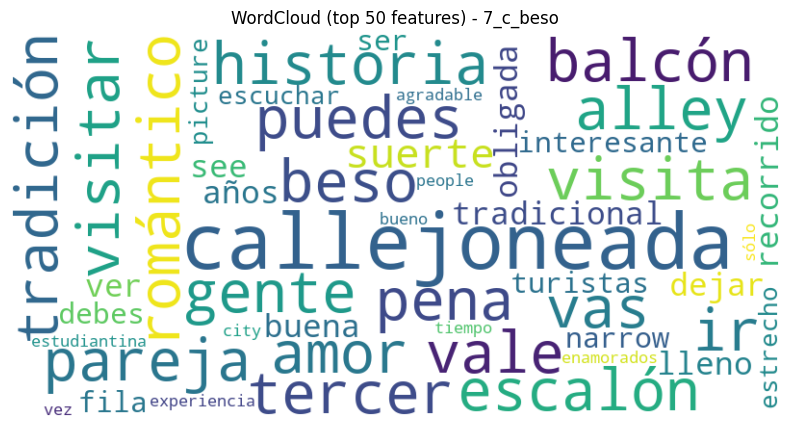


===== Generating WordCloud of characteristics for: 8_pipila =====


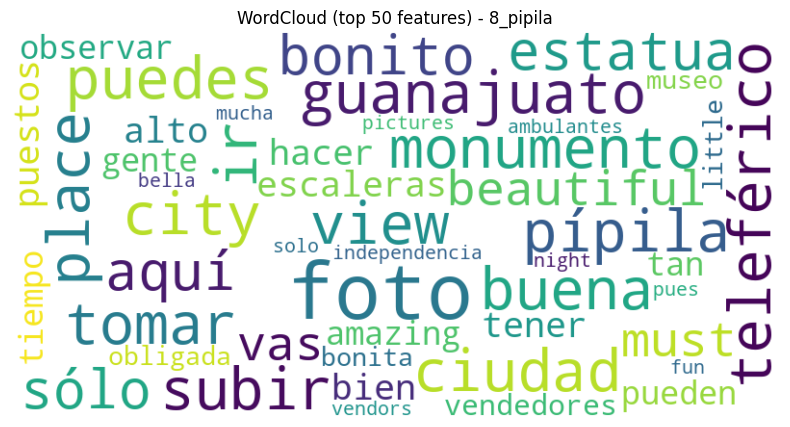


===== Generating WordCloud of characteristics for: 9_momias =====


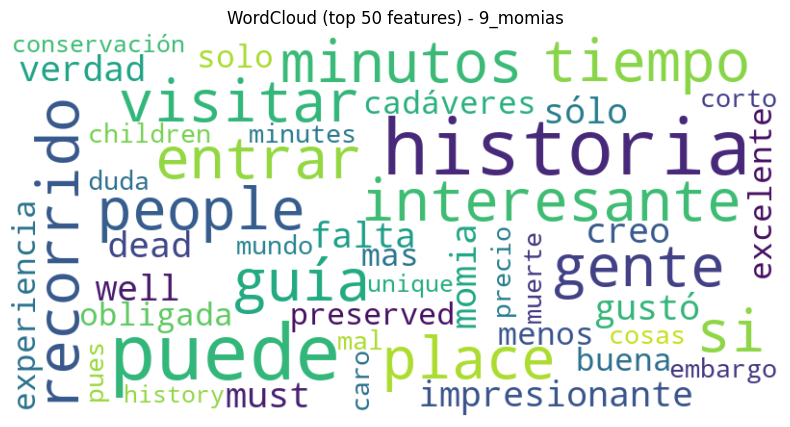

In [26]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.preprocessing import normalize
from scipy.sparse import hstack
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordclouds(dfs):
    punctuations = set(string.punctuation)
    tokenizer = TweetTokenizer()
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    stop_words = stop_words_es.union(stop_words_en)

    for name, df in dfs.items():
        print(f"\n===== Generating WordCloud of characteristics for: {name} =====")

        # Quitar filas con Scale=NaN ANTES de todo
        df = df.dropna(subset=['Scale'])
               
        corpus_uni = []
        corpus_bi = []
        corpus_tri = []

        for opinion in df['Opinion'].dropna().astype(str):
            # Unigrams: quitar stopwords y puntuación
            tokens_uni = [
                token.lower() for token in tokenizer.tokenize(opinion)
                if token.lower() not in punctuations and token.lower() not in stop_words
            ]

            # join unigrams again to feed into tfidf from scikit
            corpus_uni.append(' '.join(tokens_uni))

        def sorted_tfidf_and_matrix(corpus, n_gram=1, terms=1000):
            vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
            tfidf_matrix = vectorizer.fit_transform(corpus)
            tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()
            indices_top_n = tfidf_sum.argsort()[::-1][:terms]
            feature_names = np.array(vectorizer.get_feature_names_out())
            tfidf_matrix_top = tfidf_matrix[:, indices_top_n]
            return tfidf_matrix_top, feature_names[indices_top_n]

        # make a sorted tfidf corpus with each unigram, bigram, trigram
        tfidf_uni, vocab_uni = sorted_tfidf_and_matrix(corpus_uni, n_gram=1, terms=1000)
        tfidf_bi, vocab_bi = sorted_tfidf_and_matrix(corpus_uni, n_gram=2, terms=2000)
        tfidf_tri, vocab_tri = sorted_tfidf_and_matrix(corpus_uni, n_gram=3, terms=1000)

        # Reeplace slash
        #vocab_bi = [v.replace('_',' ') for v in vocab_bi]
        #vocab_tri = [v.replace('_',' ') for v in vocab_tri]

        # join horizontally to keep interpretability for each document
        # Normalize before join, l2 for each document.
        tfidf_uni = normalize(tfidf_uni, norm='l2', axis=1)
        tfidf_bi = normalize(tfidf_bi, norm='l2', axis=1)
        tfidf_tri = normalize(tfidf_tri, norm='l2', axis=1)
        
        X = hstack([tfidf_uni, tfidf_bi, tfidf_tri])

        # Find information gain for each term in predicting the grade of the place
        y = df['Scale']
        
        # Calcular ganancia de información
        selector = SelectKBest(score_func=chi2, k=1000)
        X_selected = selector.fit_transform(X, y)

        # Obtener los índices y nombres de las 1000 características seleccionadas
        selected_indices = selector.get_support(indices=True)
        full_vocab = np.concatenate([vocab_uni, vocab_bi, vocab_tri])
        selected_features = full_vocab[selected_indices]
        
        # Crear un solo string separando por espacios (para el WordCloud)
        top_50_text = ' '.join(selected_features[:50])
        # Generar el wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=80).generate(top_50_text)
        # Mostrar el wordcloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"WordCloud (top 50 features) - {name}")
        plt.show()
        
generate_wordclouds(dfs)

5. As a final step we will analyze each place reviews over time. We are interested in visualizing how positive and negative perception of the place may have shifted. 

In this last approach we will use a classic approach, which will consist of using the filtered statistics for each place by averaging the grade.

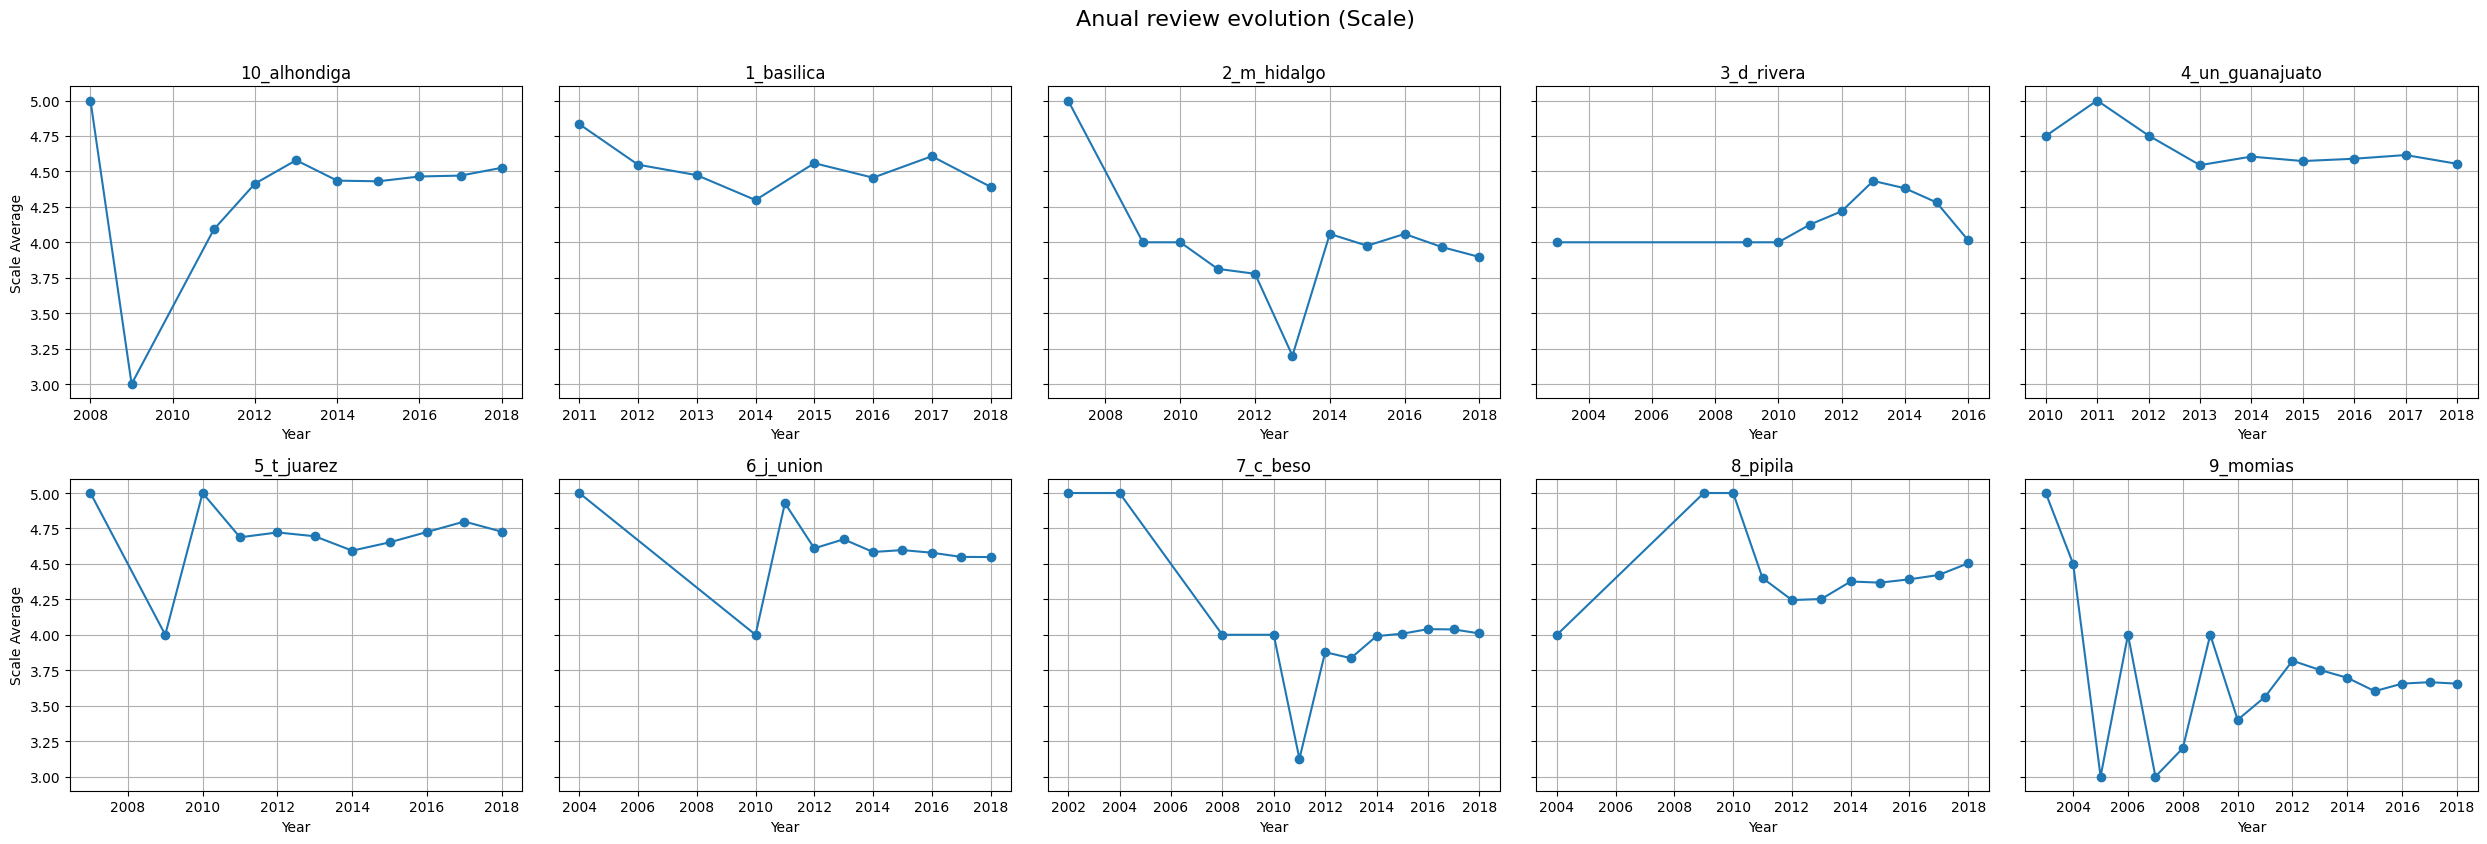

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_scale_by_year(dfs):
    """
    Itera sobre cada DataFrame del diccionario dfs,
    calcula el promedio anual de 'Scale' y grafica todo en una cuadrícula.
    """
    n_datasets = len(dfs)
    n_cols = 5  # columnas en la cuadrícula
    n_rows = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=True)
    axes = axes.flatten()  # aplanar para indexar fácilmente

    for idx, (name, df) in enumerate(dfs.items()):
        # clean subset
        df_clean = df.dropna(subset=['Date', 'Scale']).copy()
        #make sure its date format
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        # Get anual average
        df_clean['Year'] = df_clean['Date'].dt.year
        mean_per_year = df_clean.groupby('Year')['Scale'].mean()

        # Graficar en el subplot correspondiente
        ax = axes[idx]
        mean_per_year.plot(marker='o', ax=ax)
        ax.set_title(f"{name}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Scale Average")
        ax.grid(True)

    plt.tight_layout()
    plt.suptitle("Anual review evolution (Scale)", fontsize=16, y=1.05)
    plt.show()

# Uso
plot_average_scale_by_year(dfs)
